In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd
data = pd.read_csv('Unemployment.csv')
data.columns = data.columns.str.strip()

In [3]:
data.columns
print(data.head())
print(data.describe())
print(data.isnull().sum())

           Region         Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019   Monthly                             3.65   
1  Andhra Pradesh   30-06-2019   Monthly                             3.05   
2  Andhra Pradesh   31-07-2019   Monthly                             3.75   
3  Andhra Pradesh   31-08-2019   Monthly                             3.32   
4  Andhra Pradesh   30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000     

In [4]:
data = data.dropna()
label_encoder = LabelEncoder()
data['Region'] = label_encoder.fit_transform(data['Region'])
data.columns = data.columns.str.strip()

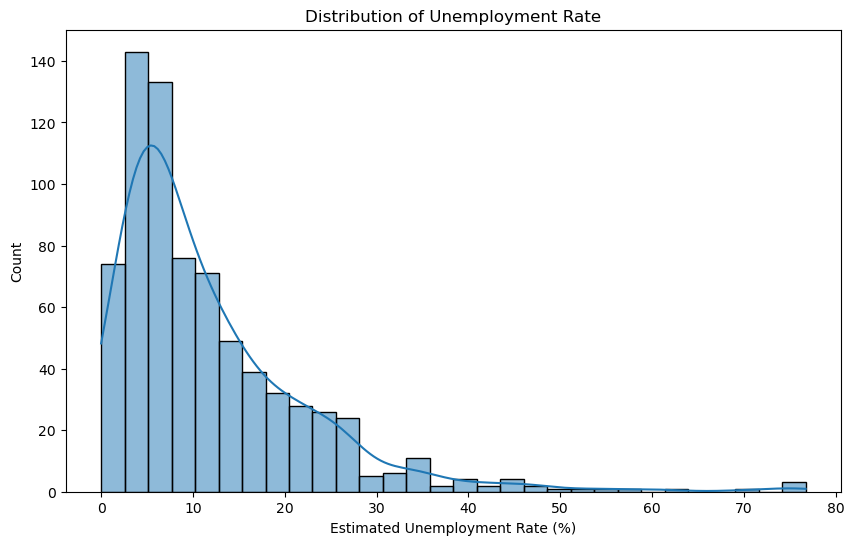

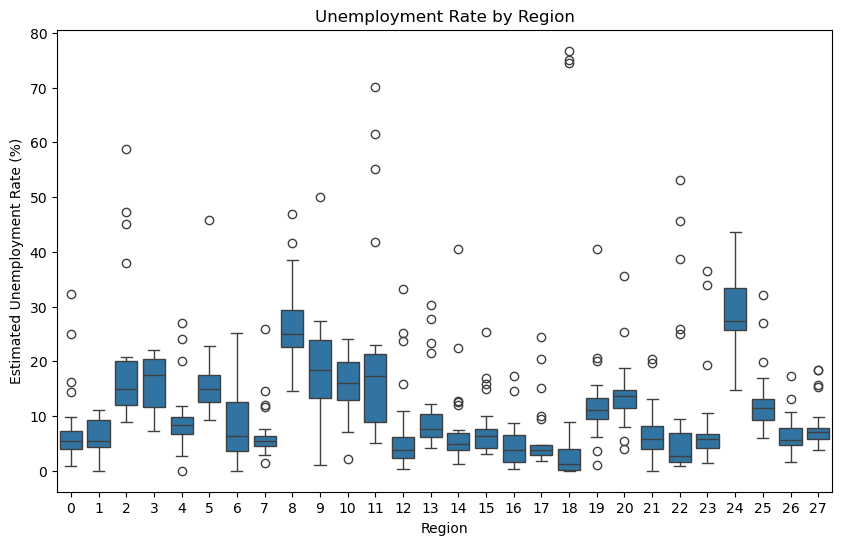

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.show()
X = data[['Region', 'Frequency', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = data['Estimated Unemployment Rate (%)']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=data)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

In [6]:
X = data[['Region', 'Frequency', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = data['Estimated Unemployment Rate (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import LabelEncoderle = LabelEncoder()
data['Region'] = le.fit_transform(data['Region'])
data['Frequency'] = le.fit_transform(data['Frequency'])
X = data[['Region', 'Frequency', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = data['Estimated Unemployment Rate (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 137.92162039409112
R-squared: 0.04735596356773253


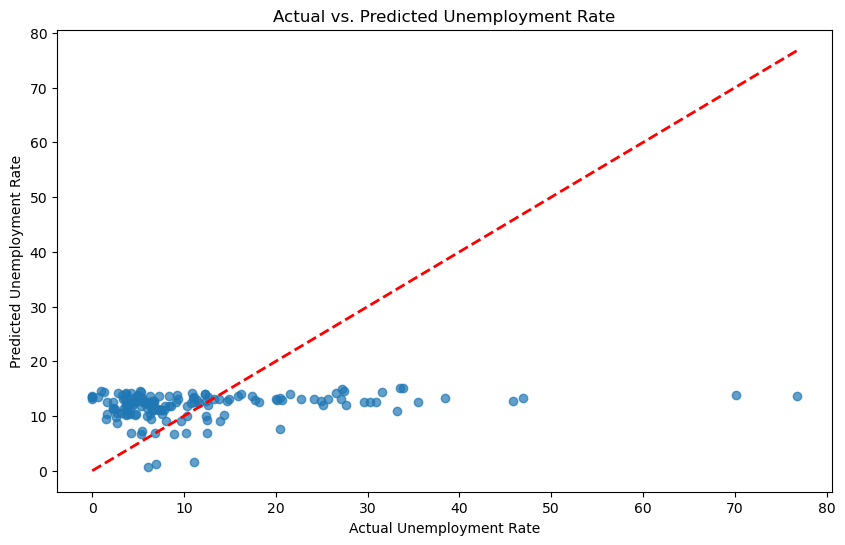

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Actual vs. Predicted Unemployment Rate')
plt.show()

In [9]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                          Coefficient
Region                                  -8.601530e-03
Frequency                                6.200565e-01
Estimated Employed                      -2.751968e-07
Estimated Labour Participation Rate (%)  5.322733e-02


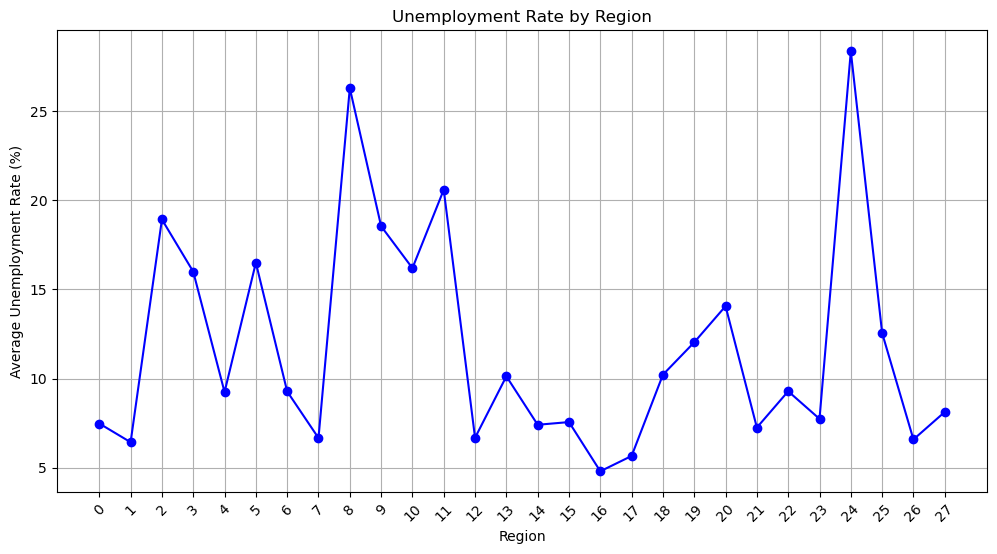

In [12]:
region_unemployment = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(12, 6))
plt.plot(region_unemployment.index, region_unemployment.values, marker='o', linestyle='-', color='b')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.xticks(ticks=region_unemployment.index, labels=region_unemployment.index, rotation=45)
plt.grid(True)
plt.show()